<a href="https://colab.research.google.com/github/skflwright/Python_Projects_Data_201/blob/main/Citibike_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA 201 Capstone Project**#
#NYC Bike Sharing An Analysis of Citibike Riders in Q1 2022#



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline


#**Data Source & Dictionary**#

The data for this analysis was taken from the citibike trip data available at https://s3.amazonaws.com/tripdata/index.html

Given the density of data available, this analysis has been limited to first quarter 2022, providing an analysis of over four million rides (4,179,675) as attempts to include the second quarter brought the total number to over six million, which my computer could not manage to process for data visualizations.

**Data Dictionary** There is no formal dictionary of the data provided by citibike via csv files. The csv data includes up to date monthly reports that entail the date and time of each ride, the start and end destinations, the membership status of the rider and the type of bike the rider used (electric or classic). 

**Data Challenges** Due to the rather large size of these csv files, it was necessary to upload the files into colab using the import files function. In addition to this, the large nature of the data slowed down upload times, making it necessary to upload each month separately, drop nonessential columns and then merge the months thereafter. 

Attempts were made to include six months worth of data for a quarterly comparison but the size of the combined data was too much for my computer to handle without crashing. 


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 202201-citibike-tripdata.csv to 202201-citibike-tripdata.csv


In [3]:
import io
jan = pd.read_csv(io.BytesIO(uploaded['202201-citibike-tripdata.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,4488.09,Clinton St & Joralemon St,4605.04,40.688489,-73.991160,40.692395,-73.993379,member
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,5616.08,E 10 St & Avenue A,5659.05,40.727243,-73.976831,40.727408,-73.981420,member
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,6140.05,W 44 St & 11 Ave,6756.05,40.741740,-73.994156,40.762009,-73.996975,member
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,6850.01,Crescent St & 30 Ave,6958.06,40.764175,-73.915840,40.768692,-73.924957,member
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,4362.04,Clinton St & Tillary St,4748.07,40.685376,-73.983021,40.696233,-73.991421,member


In [5]:
jan.shape

(1052418, 13)

#**Data Wrangling and Exploratory Data Analysis**#

**Data Wrangling**

The data provided by Citibank was very clean in the sense that there are no typos or incorrect data entries.  Those areas where there were null values were only found in the end_station and end station geocoordinate columns. This might indicate that the bikes could not dock properly at the end destination, that the bikes were simply abandoned or that they were stolen, all of which fall outside of the scope of this ananlysis. As such, any such null values have been removed. 

Removing the null values decreased the number of rows by 13,375, leaving 4,179,576 trips to analyze. 

To facilitate analysis, I dropped nonessential columns, including station ids, and latitude & longitude geo-coordinates.

I reformated the started_at and ended_at columns to datetime format so that I could create a new column called 'ride_time' to calculate the time of each ride from the start point unti the end point based on the unique ride ID. 

As each of the months are in separate csv files, I imported each month and then merged them using an outer merge. 

**Exploratory Data Analysis**

In looking at the data, I learned that it would be possible to analyze users based on membership status, and types of bikes used (electric versus classic) and determine basic descriptive statistics about the average ride time, number of rides, types of rides and top start and end destinations. 

In [6]:
drop_cols=['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng']


In [7]:
jan.drop(drop_cols,inplace=True,axis=1)

In [8]:
jan.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,Clinton St & Joralemon St,member
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,E 10 St & Avenue A,member


In [9]:
jan.shape

(1052418, 7)

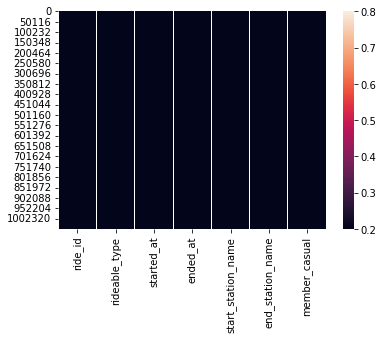

In [10]:
sns.heatmap(jan.isnull(),cbar=True,vmin=.2,vmax=.8)

In [11]:
jan.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
end_station_name      9231
member_casual            0
dtype: int64

In [12]:
jan.dropna() #Dropping null values removed 9,231 rows of dataj from the 'end_station_name'.
#This could indicate improper docking (check) or abandoned/stolen bikes (check inventory)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,Clinton St & Joralemon St,member
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,E 10 St & Avenue A,member
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,W 44 St & 11 Ave,member
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,Crescent St & 30 Ave,member
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,Clinton St & Tillary St,member
...,...,...,...,...,...,...,...
1052413,3A8436E896501EB6,classic_bike,2022-01-09 09:40:49,2022-01-09 09:58:55,27 St & Hunter St,Vernon Blvd & 50 Ave,casual
1052414,31EE3AF319AE47D2,classic_bike,2022-01-26 16:11:27,2022-01-26 16:17:20,Monroe St & Bedford Ave,Putnam Ave & Throop Ave,casual
1052415,C27D809EC458BE2A,electric_bike,2022-01-20 11:39:41,2022-01-20 11:44:46,E 118 St & 1 Ave,Lexington Ave & E 111 St,member
1052416,4968572973DEDCB2,electric_bike,2022-01-18 21:17:11,2022-01-18 21:25:57,Allen St & Hester St,1 Ave & E 18 St,member


In [13]:
jan.to_csv("C:\\Users\\Kimberly\\Documents\\jan.csv") # tried to see if I could export the file to a local host csv file but it did not work, perhaps due to file size?

In [14]:
from google.colab import files
uploaded = files.upload()

Saving 202202-citibike-tripdata.csv to 202202-citibike-tripdata.csv


In [15]:
import io
feb = pd.read_csv(io.BytesIO(uploaded['202202-citibike-tripdata.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
feb.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C29577D0141AACD,electric_bike,2022-02-27 16:00:58,2022-02-27 16:10:09,Cliff St & Fulton St,5065.14,Norfolk St & Broome St,5374.01,40.708380,-74.004950,40.717227,-73.988021,member
1,353462A61AFB32C8,classic_bike,2022-02-02 18:09:30,2022-02-02 18:28:55,2 Ave & E 31 St,6197.02,Norfolk St & Broome St,5374.01,40.742909,-73.977061,40.717227,-73.988021,member


In [17]:
feb.shape

(1233714, 13)

In [18]:
feb.drop(drop_cols,inplace=True,axis=1)

In [19]:
feb.shape

(1233714, 7)

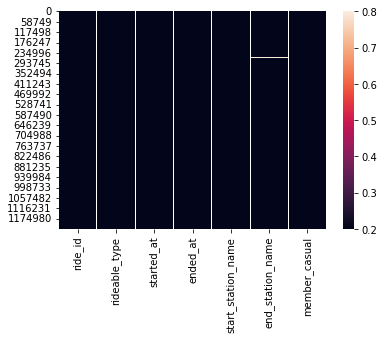

In [20]:
sns.heatmap(feb.isnull(),cbar=True,vmin=.2,vmax=.8)

In [21]:
feb.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       1
end_station_name      2324
member_casual            0
dtype: int64

In [22]:
feb.dropna() #Dropping null values removed 2,324 rows of dataj from the 'end_station_name'.
#This could indicate improper docking (check) or abandoned/stolen bikes (check inventory)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,6C29577D0141AACD,electric_bike,2022-02-27 16:00:58,2022-02-27 16:10:09,Cliff St & Fulton St,Norfolk St & Broome St,member
1,353462A61AFB32C8,classic_bike,2022-02-02 18:09:30,2022-02-02 18:28:55,2 Ave & E 31 St,Norfolk St & Broome St,member
2,220081222C7CC84D,classic_bike,2022-02-10 19:41:09,2022-02-10 19:46:03,2 Ave & E 31 St,5 Ave & E 29 St,member
3,C66CB5EDE74A7404,classic_bike,2022-02-14 15:52:02,2022-02-14 16:01:58,Bridge St & Water St,Henry St & Atlantic Ave,member
4,6B997C1E4DCDD6BF,classic_bike,2022-02-23 13:25:07,2022-02-23 15:36:45,Lafayette St & Jersey St,Fulton St & Broadway,member
...,...,...,...,...,...,...,...
1233709,DB7E2CCB36FE2470,classic_bike,2022-02-02 20:20:40,2022-02-02 20:32:36,Columbus Ave & W 95 St,E 110 St & Madison Ave,member
1233710,2589BCEF3734CEFA,electric_bike,2022-02-12 18:21:44,2022-02-12 18:30:48,Central Park West & W 85 St,E 110 St & Madison Ave,member
1233711,D808B985BB9F9D72,classic_bike,2022-02-26 12:58:46,2022-02-26 13:11:58,Stanton St & Mangin St,E 10 St & 2 Ave,casual
1233712,F3CBF555F8561BF0,electric_bike,2022-02-18 11:03:02,2022-02-18 11:06:01,E 11 St & 3 Ave,E 10 St & 2 Ave,casual


In [23]:
from google.colab import files
uploaded = files.upload()

Saving 202203-citibike-tripdata.csv to 202203-citibike-tripdata.csv


In [24]:
import io
march = pd.read_csv(io.BytesIO(uploaded['202203-citibike-tripdata.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
march.shape

(1893444, 13)

In [26]:
march.drop(drop_cols,inplace=True,axis=1)

In [27]:
march.shape

(1893444, 7)

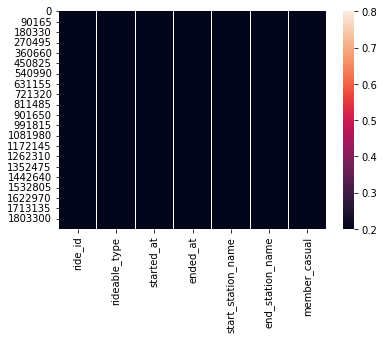

In [28]:
sns.heatmap(march.isnull(),cbar=True,vmin=.2,vmax=.8)

In [29]:
march.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       7
end_station_name      1820
member_casual            0
dtype: int64

In [30]:
march.dropna() #Dropping null values removed 2,324 rows of dataj from the 'end_station_name'.
#This could indicate improper docking (check) or abandoned/stolen bikes (check inventory)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,FA2F660C8D433037,electric_bike,2022-03-04 18:58:36,2022-03-04 19:13:51,Washington St & Barrow St,University Pl & E 14 St,member
1,03B6FE6FAEE61465,classic_bike,2022-03-06 20:37:09,2022-03-06 20:45:28,Washington St & Barrow St,W 11 St & 6 Ave,member
2,6E6995761B4A5760,classic_bike,2022-03-01 15:13:49,2022-03-01 15:19:53,1 Ave & E 110 St,E 110 St & Madison Ave,member
3,AA51CCF6CEDD6033,classic_bike,2022-03-11 13:59:03,2022-03-11 14:06:43,Crescent St & Broadway,31 Rd & 21 St,member
4,72AA3A7D430D8EF8,classic_bike,2022-03-08 14:59:16,2022-03-08 15:05:04,Crescent St & Broadway,31 Rd & 21 St,member
...,...,...,...,...,...,...,...
1893439,79E49EA8727CA662,classic_bike,2022-03-30 21:12:45,2022-03-30 21:22:15,E 72 St & York Ave,E 58 St & 3 Ave,member
1893440,9C4F6A095779AAE2,electric_bike,2022-03-21 09:33:21,2022-03-21 09:39:45,W 48 St & Rockefeller Plaza,E 58 St & 3 Ave,member
1893441,C1966A89B5078124,electric_bike,2022-03-04 14:31:36,2022-03-04 14:43:16,Central Park West & W 85 St,E 58 St & 3 Ave,member
1893442,A11D1F167EF1B8C6,classic_bike,2022-03-18 18:43:43,2022-03-18 18:53:41,W 56 St & 6 Ave,E 58 St & 3 Ave,member


In [31]:
pd.merge(jan,feb,how='outer')
FirstQuarter = pd.merge(jan,feb,how='outer')
FirstQuarter.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,Clinton St & Joralemon St,member
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,E 10 St & Avenue A,member
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,W 44 St & 11 Ave,member
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,Crescent St & 30 Ave,member
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,Clinton St & Tillary St,member


In [32]:
FirstQuarter.shape #Confirming that the dfs merged 

(2286132, 7)

In [33]:
pd.merge(FirstQuarter,march,how='outer')



,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,Clinton St & Joralemon St,member
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,E 10 St & Avenue A,member
2,D1FCEF55EB4A807F,classic_bike,2022-01-22 14:28:32,2022-01-22 14:53:18,W 21 St & 6 Ave,W 44 St & 11 Ave,member
3,E9CBDC6A0162C068,electric_bike,2022-01-19 14:49:47,2022-01-19 14:54:02,38 St & 30 Ave,Crescent St & 30 Ave,member
4,2177A5B57326CE9B,electric_bike,2022-01-16 14:36:06,2022-01-16 14:44:06,Pacific St & Nevins St,Clinton St & Tillary St,member
...,...,...,...,...,...,...,...
4179571,79E49EA8727CA662,classic_bike,2022-03-30 21:12:45,2022-03-30 21:22:15,E 72 St & York Ave,E 58 St & 3 Ave,member
4179572,9C4F6A095779AAE2,electric_bike,2022-03-21 09:33:21,2022-03-21 09:39:45,W 48 St & Rockefeller Plaza,E 58 St & 3 Ave,member
4179573,C1966A89B5078124,electric_bike,2022-03-04 14:31:36,2022-03-04 14:43:16,Central Park West & W 85 St,E 58 St & 3 Ave,member
4179574,A11D1F167EF1B8C6,classic_bike,2022-03-18 18:43:43,2022-03-18 18:53:41,W 56 St & 6 Ave,E 58 St & 3 Ave,member


In [34]:
FirstQuarter=pd.merge(FirstQuarter,march,how='outer')

In [35]:
FirstQuarter['ride_id'].is_unique #Ride_ID unique over months

True

In [36]:
FirstQuarter.shape

(4179576, 7)

In [37]:
FirstQuarter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179576 entries, 0 to 4179575
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   end_station_name    object
 6   member_casual       object
dtypes: object(7)
memory usage: 255.1+ MB


In [38]:
FirstQuarter['started_at']=pd.to_datetime(FirstQuarter['started_at'],infer_datetime_format=True)

In [39]:
FirstQuarter['ended_at']=pd.to_datetime(FirstQuarter['ended_at'],infer_datetime_format=True)

In [40]:
from datetime import date,timedelta
FirstQuarter['ride_time']=FirstQuarter['ended_at']-FirstQuarter['started_at']
FirstQuarter.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_time
0,55262E4365A955A2,classic_bike,2022-01-18 08:23:52,2022-01-18 08:28:18,Boerum Pl\t& Pacific St,Clinton St & Joralemon St,member,0 days 00:04:26
1,D272F1B15D841EC0,classic_bike,2022-01-21 09:03:22,2022-01-21 09:05:44,E 12 St & Ave C,E 10 St & Avenue A,member,0 days 00:02:22


#**Data Research Question & Analysis**#

The goal of this analysis is to determine what can be learned from first quarter trip data that would inform the marketing department on who to target and why. 

As such, the analysis focuses on users and relevant trip data.  Unfortunately, the data does not include any particulars about the users (e.g., unique user ID as opposed to unique trip ID). As such, it is rather difficult to come up with any specific data that could practically inform user personas, though ride use cases might provide system insight (such as which stations are most utilized by members versus non-members for example). 



In [41]:
FirstQuarter['ride_time'].median()

Timedelta('0 days 00:08:51')

In [42]:
FirstQuarter['ride_time'].mode()

0   0 days 00:05:04
1   0 days 00:05:21
dtype: timedelta64[ns]

In [43]:
jan.groupby(['rideable_type'])['started_at'].count()

rideable_type
classic_bike     598975
docked_bike        2818
electric_bike    450625
Name: started_at, dtype: int64

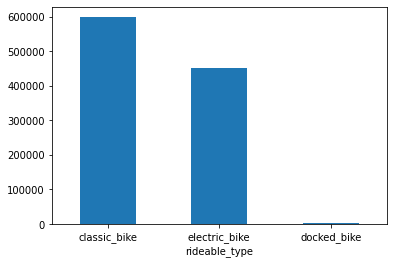

In [44]:
jan.groupby(['rideable_type'])['started_at'].count().sort_values(ascending=False).plot(kind='bar').tick_params(axis='x', rotation=0)


In [45]:
feb.groupby(['rideable_type'])['started_at'].count()

rideable_type
classic_bike     675566
docked_bike        5247
electric_bike    552901
Name: started_at, dtype: int64

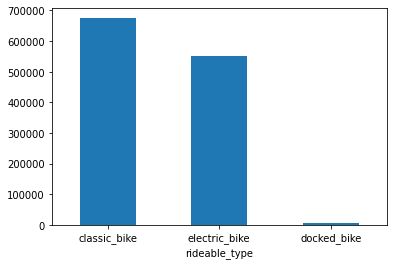

In [46]:
feb.groupby(['rideable_type'])['started_at'].count().sort_values(ascending=False).plot(kind='bar').tick_params(axis='x', rotation=0)

In [47]:
march.groupby(['rideable_type'])['started_at'].count()

rideable_type
classic_bike     1100249
docked_bike        13924
electric_bike     779271
Name: started_at, dtype: int64

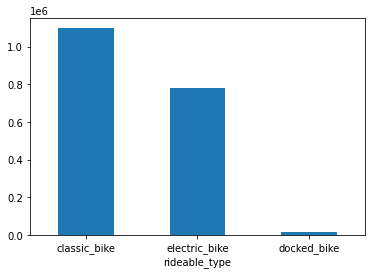

In [48]:
march.groupby(['rideable_type'])['started_at'].count().sort_values(ascending=False).plot(kind='bar').tick_params(axis='x', rotation=0)

In [49]:
FirstQuarter['ride_time'].describe() #First Quarter average ride time around 81/2 minutes, with 75% of rides under 16 minutes.

count                      4179576
mean     0 days 00:17:06.592914687
std      0 days 01:42:38.239046684
min              -1 days +23:51:16
25%                0 days 00:05:05
50%                0 days 00:08:51
75%                0 days 00:15:23
max               40 days 06:25:59
Name: ride_time, dtype: object

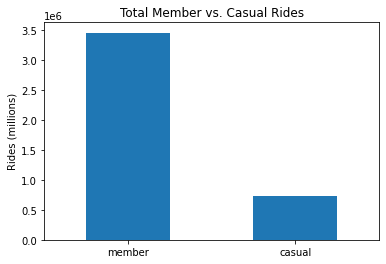

In [50]:
FirstQuarter['member_casual'].value_counts().plot(kind='bar',ylabel='Rides (millions)', title='Total Member vs. Casual Rides').tick_params(axis='x', rotation=0)


In [51]:
FirstQuarter.groupby(['rideable_type'])['started_at'].count()

rideable_type
classic_bike     2374790
docked_bike        21989
electric_bike    1782797
Name: started_at, dtype: int64

In [52]:
FirstQuarter.groupby(['rideable_type'])['started_at'].count().sum()

4179576

In [53]:
2374790/4179576 #classic bike rides over total bike rides for Q1 55.8% of rides are taken on classic citibikes

0.5681892134513166

In [54]:
1782797/4179576   #42.7% of trips in Q1 were on electric bikes

0.42654972657513585

In [55]:
FirstQuarter.groupby(['rideable_type','member_casual'])['started_at'].count()

rideable_type  member_casual
classic_bike   casual            336115
               member           2038675
docked_bike    casual             21989
electric_bike  casual            370891
               member           1411906
Name: started_at, dtype: int64

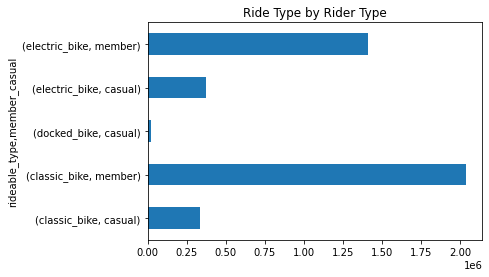

In [79]:
FirstQuarter.groupby(['rideable_type','member_casual'])['started_at'].count().plot(kind='barh',title='Ride Type by Rider Type')

In [57]:
FirstQuarter.groupby(['start_station_name'])['ride_id'].count().sort_values(ascending=False).head(10) #Top 10 starting stations

                                                                                                                        

start_station_name
W 21 St & 6 Ave            20699
1 Ave & E 68 St            18892
E 17 St & Broadway         17265
Broadway & W 58 St         16541
Broadway & E 21 St         16275
University Pl & E 14 St    16017
E 33 St & 1 Ave            15838
6 Ave & W 33 St            15428
8 Ave & W 33 St            14930
Broadway & E 14 St         14504
Name: ride_id, dtype: int64

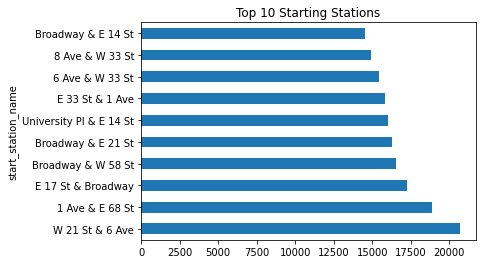

In [58]:
FirstQuarter.groupby(['start_station_name'])['ride_id'].count().sort_values(ascending=False).head(10).plot(kind='barh',title="Top 10 Starting Stations") #Top 10 starting stations

In [59]:
#Top Ten Ending Destination stations
FirstQuarter.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False).head(10)

end_station_name
W 21 St & 6 Ave            20773
1 Ave & E 68 St            18681
E 17 St & Broadway         17508
Broadway & E 21 St         16284
Broadway & W 58 St         16210
University Pl & E 14 St    16176
E 33 St & 1 Ave            15871
6 Ave & W 33 St            15463
8 Ave & W 33 St            14679
West St & Chambers St      14578
Name: ride_id, dtype: int64

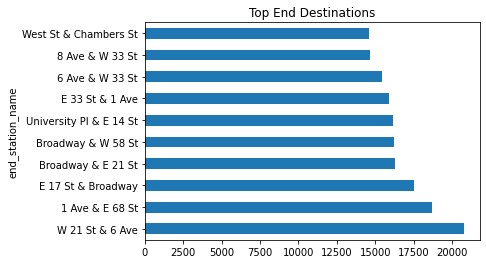

In [82]:
FirstQuarter.groupby(['end_station_name'])['ride_id'].count().sort_values(ascending=False).head(10).plot(kind='barh',title='Top End Destinations')

rt

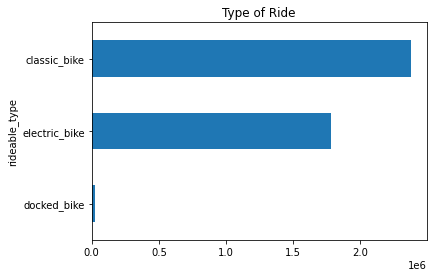

In [61]:
FirstQuarter.groupby(['rideable_type'])['started_at'].count().sort_values(ascending=True).plot(kind='barh',ylabel='Rides (millions)',title="Type of Ride")

In [62]:
FirstQuarter.groupby(['rideable_type','member_casual'])['started_at'].count().sort_values(ascending=False)


rideable_type  member_casual
classic_bike   member           2038675
electric_bike  member           1411906
               casual            370891
classic_bike   casual            336115
docked_bike    casual             21989
Name: started_at, dtype: int64

#**Summary & Key Findings**#


**Users**
The majority of users in Q122 (Jan, Feb, March 2022) were annual members. Out of 4,179,576 trips, ___

Members: 
2,038,675 trips were made on classic bikes vs. 1,411,906 on electric bikes
The majority of members (59%) ride classic bikes suggesting that members like to ride

Casual Riders: 
336,115 trips were made on classic bikes vs. 370,891 on electric
52% of casual riders ride electric bikes.

Further research into how many electric versus classic bikes are available at different stations would help to flush out whether any preferences exist for one type of bike over the other. 



**Trips**

Trip Time:
Average trip time (using median) was almost 9 minutes (8 minutes, 51 seconds) with the majority of rides taking ___  minutes. 75% of trips take under 16 minutes.

Trip Type:
55.8% of trips are made on classic citibikes (manual) versus 42.7% on electric bikes. 

Top Start Destinations: 21st & 6th Avnue, 1st & 68th Street, East 17th & Broadway, Broadway & 58th Street, Broadway & 21st Street, University Place & 14th Street, 33rd and 1st Avenue, 33rd and 6th Avenue, 33rd & 8th Avenue, Broadway & 14th Street.

The above suggests that an analysis of whether a significant correlation exists between the presence of hospitals, schools and train stations (such as NYU Hospital and the many hospitals near east 68th Street, Path and Penn Station stations such as 33rd street or Broadway and 14th and 17th) play a role in station utilization.

Top end destinations include many of the same destinations: 21st & 6th, 1st & 68th, with the addition of Chambers Street (suggesting work commuter rides but also potentially hospitals as well due to NYU having offices there). 

**2nd Quarter Analysis omitted from this project due to size/processing constraints. I'll likely do Q2 in another file and then combine the analysis externally.**

In [63]:
#from google.colab import files
#uploaded = files.upload(202204-citibike-tripdata.csv)

In [64]:
#import io
#april = pd.read_csv(io.BytesIO(uploaded['202204-citibike-tripdata.csv']))

In [65]:
#april.shape

In [66]:
#from google.colab import files
#uploaded = files.upload(202205-citibike-tripdata.csv)

In [67]:
#import io
#may = pd.read_csv(io.BytesIO(uploaded['202205-citibike-tripdata.csv']))

In [68]:
#may.shape

In [69]:
#from google.colab import files
#uploaded = files.upload(202206-citibike-tripdata.csv)

In [70]:
#import io
#june = pd.read_csv(io.BytesIO(uploaded['202206-citibike-tripdata.csv']))

In [71]:
#june.shape

In [72]:
#pd.merge(april,may,how='outer')

In [73]:
#AprMay=pd.merge(april,may,how='outer')

In [74]:
#AprMay.shape

In [75]:
#pd.merge(AprMay,june,how='outer')

In [76]:
#pd.merge(AprMay,june,how='outer')

In [77]:
#SecondQuarter=pd.merge(AprMay,june,how='outer')

In [78]:
#SecondQuarter.shape